# Predicting the Sale Price of Bulldozers using machine learning.

In this notebook. we're going to go through an example machine learning project with the goal of predicting the sale price of a bulldozer.

## 1. Problem Definition
> How well we predict the future price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for ?

## 2. Data

The data is downloaded from the kaggle bluebook for Bulldozers competition. 
https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

There are three main datasets.

* Train.csv is the training set, which contains data through the end of 2011.
 
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.
  
## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project:
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview

Note: The goal for most regression evaluation metrics is to minimize the error. For example our goal for this project would be to build a machine learning model which minimizes RMSLE.

## 4. Features

Kaggle provides a detailed dictionary detailing all of the features of the dataset. You can view this data dictionary inside the project folder as data/bluebook-for-bulldozers.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
# Import training and validation sets
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

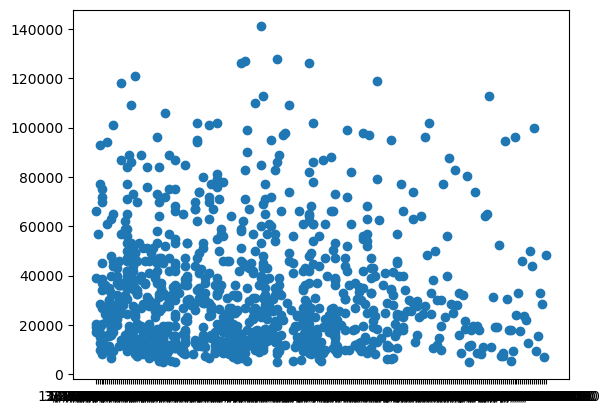

In [8]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

<Axes: ylabel='Frequency'>

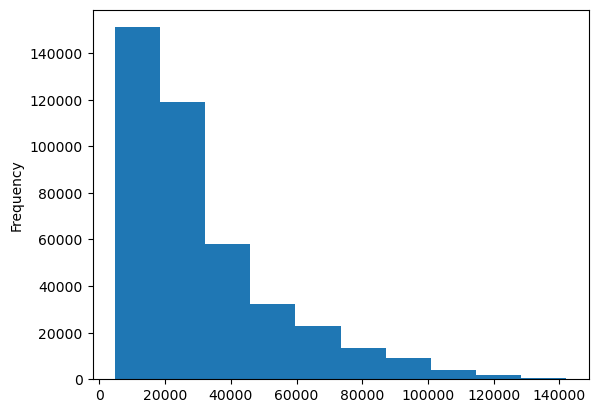

In [9]:
df.SalePrice.plot.hist()

Most of our sale prices are below 20000. and very few are relatively expensive products.

### Parsing Date

When we work with time series data, want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates init using the 'parse_dates' parameter.

In [13]:
# Again import data but with parse_dates function.
df = pd.read_csv('data/bluebook-for-bulldozers/TrainAndValid.csv',
                 low_memory=False,
                 parse_dates=['saledate'])

In [14]:
df['saledate'][:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

In [15]:
df.saledate.dtype

dtype('<M8[ns]')

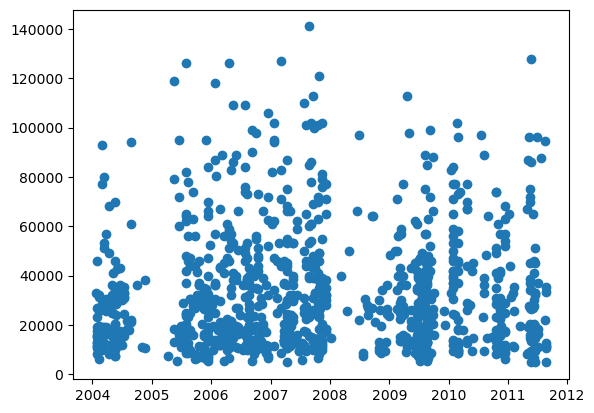

In [16]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

Look how now our x-axis is clearer now because we changed the saledate column to datetime object.

In [17]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


### Sort DataFrame by saledate

When working with timeseries data; its a good idea to sort it by date.

In [19]:
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

In [20]:
# Sort dataframe in date order.
df.sort_values(by=['saledate'], inplace = True, ascending = True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [21]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


## Make a copy of the original dataframe

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data

In [22]:
# MAke a copy of df
df_tmp = df.copy()

In [23]:
df_tmp.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [24]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Add datetime parameters for saledate column

In [25]:
df_tmp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int32

In [26]:
df_tmp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int32

In [32]:
df_tmp['saleYear'] = df_tmp['saledate'].dt.year
df_tmp['saleMonth'] = df_tmp['saledate'].dt.month
df_tmp['saleDay'] = df_tmp['saledate'].dt.day
df_tmp['saleDayOfWeek'] = df_tmp['saledate'].dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp['saledate'].dt.dayofyear


In [35]:
# Adding these enriched our dataframe with date time features we can remove saledate column -> feature engineering
df_tmp.drop('saledate', axis = 1, inplace=True)

In [37]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling

We have done enough EDA (we could always do more); lets dive into modelling our data.

In [38]:
# Lets build a model around our data.
from sklearn.ensemble import RandomForestRegressor

In [39]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(df_tmp.drop('SalePrice', axis = 1), df_tmp['SalePrice'])

ValueError: could not convert string to float: 'Low'

Now we see that this fails because our data has some non numerical types and also some missing values.
So now on we'll model the data after making up for these changes .

### Convert string into categories. 

This is possible with using pandas categories.

In [40]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [43]:
pd.api.types.is_object_dtype(df_tmp['UsageBand'])

True

In [44]:
df_tmp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],
      dtype

In [51]:
# Find the columns which contains strings.
for labels, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(labels)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [53]:
# Transforming our string / object types into categories using pandas
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content) or pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()
        

In [55]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [57]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas categories; we now have a way to access all of our data in the form of numbers. But we have a lot of missing values.

In [58]:
# Lets check for missing values.
df_tmp.isnull().sum() / len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data


In [59]:
# Export current tmp dataframe
df_tmp.to_csv('data/bluebook-for-bulldozers/train_tmp.csv', index = False)

In [60]:
# Import preprocessed data
df_tmp = pd.read_csv('data/bluebook-for-bulldozers/train_tmp.csv')
df_tmp.isnull().sum() / len(df_tmp)

/var/folders/kl/fhz8dvf51016y79gc25fgw3r0000gn/T/ipykernel_43420/496444469.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tmp = pd.read_csv('data/bluebook-for-bulldozers/train_tmp.csv')


SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Fill missing values
### Fill numeric missing values first

In [61]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [62]:
# check which numeric columns have missing values:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [63]:
# Fill these numeric missing values by median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            df_tmp[label + '_is_missing'] = pd.isnull(content)
            df_tmp[label] = content.fillna(content.median())


In [65]:
df_tmp.MachineHoursCurrentMeter.isnull().sum()

0

Using median here because it is not prone to outliers while mean is.

In [71]:
# Check if numeric columns has any null values:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
       

In [72]:
# Check what our binary column did:
df_tmp.MachineHoursCurrentMeter_is_missing.value_counts()

MachineHoursCurrentMeter_is_missing
True     265194
False    147504
Name: count, dtype: int64

In [73]:
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

### Filling and turning categorical variables into numbers


In [76]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [80]:
# Turn categorical variables into numbers and fill missing 
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate this sample had any missing values
        df_tmp[label + '_is_missing'] = pd.isnull(content)
        # Turn categorical columns into numerical and add one
        df_tmp[label] = pd.Categorical(content).codes + 1

In [78]:
pd.Categorical(df_tmp['state']).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

Observe how we first transformed our string or object type variables into categorical and later filled their missing values.
Then we filled missing values of our numerical variables by their means. and now we have complete data set availale for modelling.

In [81]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [84]:
df_tmp.isna().sum()[:20]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
dtype: int64

In [85]:
len(df_tmp)

412698

In [86]:
%%time
# Instantiate ML model. 
#in this case RandomForestRegressor.
model = RandomForestRegressor(n_jobs = -1)

#Fit the model
model.fit(df_tmp.drop('SalePrice', axis = 1), df_tmp['SalePrice'])

CPU times: user 11min 15s, sys: 4.32 s, total: 11min 19s
Wall time: 1min 35s


RandomForestRegressor(n_jobs=-1)

In [87]:
# Score the model
model.score(df_tmp.drop('SalePrice', axis = 1), df_tmp['SalePrice'])

0.9875490320305479

**Question**:  Why doesnot the above metric hold water / why isn't reliable ?

Because we have evaluated the model on the same data rather than a unseen data.

### Split the data into train/ validation sets

In [88]:
# Split data into training and validation sets.
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [91]:
# Split data into X and y
X_train = df_train.drop('SalePrice', axis = 1)
y_train = df_train['SalePrice']

X_valid = df_val.drop('SalePrice', axis = 1)
y_valid = df_val['SalePrice']

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function


In [99]:
# Create evaluation function ( The competition uses RMSLE )

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rsmle(y_test, y_preds):
    """
    Calculate root mean squared log error b/w predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Train MAE': mean_absolute_error(y_train, train_preds),
            'Valid MAE': mean_absolute_error(y_valid, val_preds),
            'Training RMSLE': rsmle(y_train, train_preds),
            'Valid RMSLE': rsmle(y_valid, val_preds),
            'Training R^2': r2_score(y_train, train_preds),
            'Valid R^2': r2_score(y_valid, val_preds)}
                                  
    return scores

### Testing our model on a subset. ( to tune the hyperparameters )

In [94]:
# # This takes far too long for experimenting

# model = RandomForestRegressor(n_jobs=-1, random_state=42)
# model.fit(X_train, y_train)

len(X_train)

401125

We choose samples for experimentation because it would take too long to fit the model on entire data.
**This means that our model would go with 100 estimators (n_estimators = 100) over only a sample of data indiviually.**

In [96]:
# Change max_samples value

model = RandomForestRegressor(n_jobs = 1, random_state=42, max_samples= 10000)

In [97]:
%%time
# With reduced number of samples each estimator would have to see
model.fit(X_train, y_train)

CPU times: user 13.7 s, sys: 115 ms, total: 13.8 s
Wall time: 13.9 s


RandomForestRegressor(max_samples=10000, n_jobs=1, random_state=42)

In [100]:
show_scores(model)

{'Train MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

Here we trained our model on a subset of data i.e only 10000 samples for each estimator. Remember that evaluation metrics from validation set must be lower than that from test set becuase if they aren't it implies overfitting which must be avoided. 

### Hyperparameter tuning with RandomizedSearchCV


In [103]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid = {'n_estimators': np.arange(10,100,10),
          'max_depth': [None, 3, 5, 10],
          'min_samples_split': np.arange(2, 20, 2),
          'min_samples_leaf': np.arange(1,20,2),
          'max_features': [0.5, 1, 'sqrt'],
          'max_samples': [10000]}

rs_model = RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs = -1, random_state=42),
                             cv=5, verbose=True, param_distributions= rf_grid, n_iter=2)

#Fit the RandomizedSearchCV
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: user 12.3 s, sys: 876 ms, total: 13.2 s
Wall time: 12.4 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [107]:
# Find the best model hyperparameters.
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 18,
 'min_samples_leaf': 15,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [105]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Train MAE': 6655.548430897588,
 'Valid MAE': 7998.244866853119,
 'Training RMSLE': 0.2983567681676566,
 'Valid RMSLE': 0.32081092662891153,
 'Training R^2': 0.8052025167205393,
 'Valid R^2': 0.7913817067338706}

## Train a model with best hyperparameters.

**Note:** These were found after 100 iterations of RandomizedSearchCV

In [106]:
%%time

# Most ideal hyperparameters. -> Note these parameters were found by sir Daniel and took 2 hours of tuning to find.
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf = 1,
                                    min_samples_split= 14,
                                    max_features = 0.5,
                                    n_jobs = -1,
                                   max_samples=None)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 1min 57s, sys: 764 ms, total: 1min 57s
Wall time: 16.3 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [109]:
# Scores of ideal model (trained on all the data)
show_scores(ideal_model)

{'Train MAE': 2955.6687689615387,
 'Valid MAE': 5958.570119702941,
 'Training RMSLE': 0.14486376321676944,
 'Valid RMSLE': 0.2462497308564138,
 'Training R^2': 0.9588034908275023,
 'Valid R^2': 0.880859252070158}

In [110]:
# Score of rs model (trained on 10000 samples)
show_scores(rs_model)

{'Train MAE': 6655.548430897588,
 'Valid MAE': 7998.244866853119,
 'Training RMSLE': 0.2983567681676566,
 'Valid RMSLE': 0.32081092662891153,
 'Training R^2': 0.8052025167205393,
 'Valid R^2': 0.7913817067338706}

## Make predictions on the test data


In [141]:
# Import the test data 
df_test = pd.read_csv('data/bluebook-for-bulldozers/Test.csv', low_memory=False, parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [142]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

## Preprocessing the data. (getting the test data set in the same format as our training dataset)
Machine learning tipbit -> transformation you do on training data set your have to do them on test dataset. (MUST).

In [143]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df
    """
    df['saleYear'] = df['saledate'].dt.year
    df['saleMonth'] = df['saledate'].dt.month
    df['saleDay'] = df['saledate'].dt.day
    df['saleDayOfWeek'] = df['saledate'].dt.dayofweek
    df['saleDayOfYear'] = df['saledate'].dt.dayofyear

    df.drop('saledate', axis = 1, inplace = True)

    # Fill numeric missing values with median values
    # Fill these numeric missing values by median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing
                df[label + '_is_missing'] = pd.isnull(content)
                df[label] = content.fillna(content.median())



    # Turn object types vars into categorical and fill n/a s by first turning categories into numbers.

        if not pd.api.types.is_numeric_dtype(content):
            df[label + '_is_missing'] = pd.isnull(content)
            # We add +1 to the category code because pandas encode missing values as -1
            df[label] = pd.Categorical(content).codes + 1

    return df


In [144]:
# Preprocess test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


what we see is that our train set has 102 columns while our test set has 101 so our ML model wont work like:

As seen auctioneerID_is_missing is our test set. and we can confirm this further as :


In [145]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [146]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally now our test dataframe has same features as train df. so we can make predictions.

In [147]:
set(X_train.columns) - set(df_test.columns)

set()

In [148]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [151]:
df_test_reordered = df_test.reindex(columns = X_train.columns)


In [152]:
test_preds = ideal_model.predict(df_test_reordered)

In [153]:
test_preds

array([17512.45214938, 17182.09823432, 44948.26776835, ...,
       12369.20166758, 18090.2850611 , 27554.35104089])

We have made some predictions but they are not in the format Kaggle is asking for

In [155]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17512.452149
1,1227844,17182.098234
2,1227847,44948.267768
3,1227848,68656.653700
4,1227863,56925.213318
...,...,...
12452,6643171,39210.174609
12453,6643173,11252.794554
12454,6643184,12369.201668
12455,6643186,18090.285061


In [156]:
# Export predictions data to csv
df_preds.to_csv('data/bluebook-for-bulldozers/test_predictions.csv', index = False)

### Feature Importance
Feature importance seeks to figure out which different attributes of the data were most important in predicting the target variable (Sale Price).

In [157]:
# Find feature importance of our best model.
ideal_model.feature_importances_

array([3.33241184e-02, 2.17654502e-02, 4.16787119e-02, 1.66264916e-03,
       3.32486966e-03, 2.04864996e-01, 3.28102931e-03, 1.01777908e-03,
       4.03056245e-02, 5.18104807e-02, 6.56477165e-02, 4.56531840e-03,
       2.25789031e-02, 1.62405775e-01, 4.06038450e-02, 5.95775489e-03,
       2.23507708e-03, 2.85623877e-03, 3.30297847e-03, 5.41392835e-02,
       4.85982863e-04, 6.98915080e-05, 9.32911036e-04, 1.48818335e-04,
       8.64757518e-04, 2.94363165e-05, 5.35600101e-05, 6.26755514e-03,
       2.22277404e-03, 2.19489886e-03, 2.45706414e-03, 4.96276415e-03,
       2.48328922e-03, 2.43258212e-03, 2.20228446e-03, 1.43314628e-02,
       1.01638937e-03, 9.16079361e-03, 3.09632748e-03, 1.51301497e-03,
       6.88359768e-04, 8.86762738e-04, 2.47299049e-03, 6.75390773e-04,
       5.82722857e-04, 3.60905851e-04, 5.65211434e-04, 2.29645948e-03,
       8.06923807e-04, 3.17521180e-04, 1.44667691e-04, 7.38770303e-02,
       3.85128681e-03, 5.68495471e-03, 2.93813632e-03, 9.83575152e-03,
      

In [159]:
len(ideal_model.feature_importances_), len(X_train.columns)

(102, 102)

Hence we see one value for every column.

In [166]:
# Now we would create a plot to visualize the top 20 features from our data.
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,
                      'feature_importances': importances})
         .sort_values('feature_importances', ascending = False)
         .reset_index(drop = True))
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:20])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importance')
    ax.invert_yaxis()

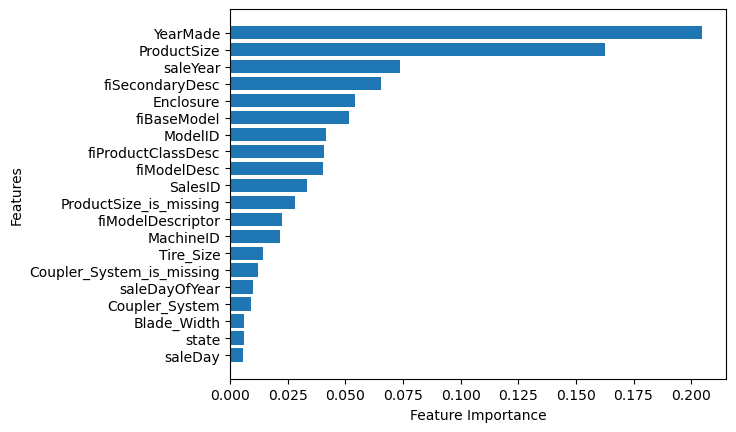

In [167]:
plot_features(X_train.columns, ideal_model.feature_importances_)